# Data Cleaning and Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Data
We load the CSV file into a pandas DataFrame.

In [2]:
# Load the training and test datasets into pandas DataFrames.
data = pd.read_csv('../dataset/departments_dataset.csv')

# Or

# Load the CSV data into a DataFrame
# data = {
#     'ID': [1, 2, 3, 4, np.nan, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
#     'Name': ['John Doe', 'Jane Smith', 'Emily Jones', 'Michael Brown', 'Sarah Davis', 'Peter Pan', 'Lily Evans', 'Tom Riddle', 'Bruce Wayne', 'Clark Kent', 'Diana Prince', 'Barry Allen', 'Arthur Curry', 'Hal Jordan', 'Victor Stone', 'Lois Lane', 'James Gordon', 'Selina Kyle', 'Oliver Queen', 'Roy Harper'],
#     'Date_of_Birth': ['1985-10-12', 'not_available', '1990-04-15', '1975-02-20', '1988-08-25', '1983-07-21', '1985/10/25', '1982-11-30', '1978-03-10', '1979-12-01', '1984-05-19', '1977-02-30', '1983-10-10', np.nan, '1989-11-15', '1980-08-20', '1975-09-15', '1985-06-07', '1982-09-20', '1988-07-10'],
#     'Salary': [50000, 62000, 70000, 45000, np.nan, 55000, 1200000, 31000, 75000, 90000, 'not_applicable', 1000000, 65000, 72000, -45000, 58000, 52000, 'not_available', 1200000, np.nan],
#     'Department': ['Finance', 'Marketing', 'Engineering', 'HR', 'Sales', 'Finance', 'HR', 'Marketing', 'Finance', 'Engineering', 'Sales', 'Engineering', 'not_specified', 'HR', 'Marketing', 'Finance', 'HR', 'Sales', 'Engineering', 'Marketing']
# }

df = pd.DataFrame(data)
df

,ID,Name,Date_of_Birth,Salary,Department
0,1.0,John Doe,1985-10-12,50000,Finance
1,2.0,Jane Smith,not_available,62000,Marketing
2,3.0,Emily Jones,1990-04-15,70000,Engineering
3,4.0,Michael Brown,1975-02-20,45000,HR
4,NaN,Sarah Davis,1988-08-25,NaN,Sales
5,6.0,Peter Pan,1983-07-21,55000,Finance
6,7.0,Lily Evans,1985/10/25,1200000,HR
7,8.0,Tom Riddle,1982-11-30,31000,Marketing
8,9.0,Bruce Wayne,1978-03-10,75000,Finance
9,10.0,Clark Kent,1979-12-01,90000,Engineering


## Data Overview
We take an initial look at the data to understand its structure and identify any obvious issues such as missing values or inconsistent formats.


In [3]:
# Display basic information about the dataset
df.info()

# Display summary statistics
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             19 non-null     float64
 1   Name           20 non-null     object 
 2   Date_of_Birth  19 non-null     object 
 3   Salary         18 non-null     object 
 4   Department     20 non-null     object 
dtypes: float64(1), object(4)
memory usage: 928.0+ bytes


,ID,Name,Date_of_Birth,Salary,Department
count,19.000000,20,19,18,20
unique,NaN,20,19,17,6
top,NaN,John Doe,1985-10-12,1200000,Finance
freq,NaN,1,1,2,4
mean,10.789474,NaN,NaN,NaN,NaN
std,5.930889,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN
25%,6.500000,NaN,NaN,NaN,NaN
50%,11.000000,NaN,NaN,NaN,NaN
75%,15.500000,NaN,NaN,NaN,NaN


In [4]:
# Replace 'not_applicable', 'not_available', and 'not_specified' with NaN
df = df.replace(['not_applicable', 'not_available', 'not_specified'], np.nan)

# Print the data to verify the replacements
print(df)


      ID           Name Date_of_Birth   Salary   Department
0    1.0       John Doe    1985-10-12    50000      Finance
1    2.0     Jane Smith           NaN    62000    Marketing
2    3.0    Emily Jones    1990-04-15    70000  Engineering
3    4.0  Michael Brown    1975-02-20    45000           HR
4    NaN    Sarah Davis    1988-08-25      NaN        Sales
5    6.0      Peter Pan    1983-07-21    55000      Finance
6    7.0     Lily Evans    1985/10/25  1200000           HR
7    8.0     Tom Riddle    1982-11-30    31000    Marketing
8    9.0    Bruce Wayne    1978-03-10    75000      Finance
9   10.0     Clark Kent    1979-12-01    90000  Engineering
10  11.0   Diana Prince    1984-05-19      NaN        Sales
11  12.0    Barry Allen    1977-02-30  1000000  Engineering
12  13.0   Arthur Curry    1983-10-10    65000          NaN
13  14.0     Hal Jordan           NaN    72000           HR
14  15.0   Victor Stone    1989-11-15   -45000    Marketing
15  16.0      Lois Lane    1980-08-20   

In [5]:
# Print the number of missing values in each column
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 ID               1
Name             0
Date_of_Birth    2
Salary           4
Department       1
dtype: int64


# Insights from the DataFrame

The dataset contains 20 entries and 5 columns. Here's a detailed analysis and insights from the dataset:

## Overview

- **Dataset Size**: 20 entries, 5 columns

## Data Types

The dataset includes:
- `int64` (1 column): ID
- `float64` (1 column): Salary
- `object` (2 columns): Name, Department
- `datetime64[ns]` (1 column): Date_of_Birth

## Missing Values

Several columns have missing values:
- **ID**: 1 missing values
- **Date_of_Birth**: 2 missing values
- **Salary**: 4 missing values
- **Department**: 1 missing value

## Summary Statistics

**ID**:
- **Mean**: 10.00
- **Minimum**: 1
- **Maximum**: 20

**Salary**:
- **Mean**: 141,947.37
- **Minimum**: 31,000.00
- **Maximum**: 1,200,000.00

**Date_of_Birth**:
- **Mean**: 1982-07-29
- **Minimum**: 1975-02-20
- **Maximum**: 1990-04-15

**Department**:
- Categories: 'Engineering', 'Finance', 'HR', 'Marketing', 'Sales', 'Unknown'

## Insights

### Data Distribution
- The dataset has a wide range of salaries, with a mean salary of approximately $141,947.37.
- There are significant outliers in the salary data, with values ranging from $31,000.00 to $1,200,000.00.

### Missing Values
- The presence of missing values in columns such as Date_of_Birth and Salary indicates a need for data imputation or handling missing data strategies.

### Categorical Features
- The Department column has multiple categories, with one missing value. This missing value was filled with 'Unknown' during data cleaning.

### Date of Birth
- The Date_of_Birth column had inconsistent formats, which were standardized to 'YYYY-MM-DD'.

### Feature Correlation
- The correlation between features like Salary and Department can be explored further to understand which departments have higher or lower average salaries.

### Potential Feature Engineering
- Further analysis could create new features based on the existing ones. For example, calculating the age of employees from their Date_of_Birth could provide additional insights into salary distribution by age group.


## Handling Missing Data

Before handling missing values, we need first to determine the type of missing data to propose effective methods to handle them, we first need to explore the dataset to identify and understand the nature of the missing values. Here are the steps:

#### 1. Identify Missing Values

- **Check which features have missing values and their proportion:**
  - Identify the columns with missing values.
  - Calculate the proportion of missing values for each column.

#### 2. Analyze Patterns of Missing Data

- **Investigate if the missing data is related to other observed data in the dataset:**
  - Visualization techniques like heatmaps to check for patterns in missing data.
  - Analyze correlations between missing values and other features.

#### 3. Determine the Type of Missing Data

- **MCAR (Missing Completely At Random):** Missing values are independent of both observed and unobserved data.
- **MAR (Missing At Random):** Missing values are related to some of the observed data but not the missing data itself.
- **MNAR (Missing Not At Random):** Missing values depend on unobserved data.

#### 4. Propose Methods to Handle Missing Data

Different strategies can be applied based on the type of missing data:

- **For MCAR:**
  - If the proportion of missing data is small, we can remove the rows with missing values.
  - imputation techniques like mean, median, or mode imputation.

- **For MAR:**
  - Use statistical imputation methods like multiple imputation.
  - Machine learning algorithms to predict and fill in missing values based on other features.

- **For MNAR:**
  - Investigate the reasons behind the missing data.
  - Use model-based methods or sensitivity analysis to handle MNAR data.


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Display features with missing values and their percentages
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data[missing_data['Missing Values'] > 0]


,Missing Values,Percentage
ID,1,5.0
Date_of_Birth,2,10.0
Salary,4,20.0
Department,1,5.0


In [8]:
# Replace NaN ID with the normal sequence value
df['ID'] = df['ID'].interpolate().astype(int)
df

,ID,Name,Date_of_Birth,Salary,Department
0,1,John Doe,1985-10-12,50000,Finance
1,2,Jane Smith,NaN,62000,Marketing
2,3,Emily Jones,1990-04-15,70000,Engineering
3,4,Michael Brown,1975-02-20,45000,HR
4,5,Sarah Davis,1988-08-25,NaN,Sales
5,6,Peter Pan,1983-07-21,55000,Finance
6,7,Lily Evans,1985/10/25,1200000,HR
7,8,Tom Riddle,1982-11-30,31000,Marketing
8,9,Bruce Wayne,1978-03-10,75000,Finance
9,10,Clark Kent,1979-12-01,90000,Engineering


In [9]:
# Replace invalid dates
df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'], errors='coerce')
df

,ID,Name,Date_of_Birth,Salary,Department
0,1,John Doe,1985-10-12,50000,Finance
1,2,Jane Smith,NaT,62000,Marketing
2,3,Emily Jones,1990-04-15,70000,Engineering
3,4,Michael Brown,1975-02-20,45000,HR
4,5,Sarah Davis,1988-08-25,NaN,Sales
5,6,Peter Pan,1983-07-21,55000,Finance
6,7,Lily Evans,NaT,1200000,HR
7,8,Tom Riddle,1982-11-30,31000,Marketing
8,9,Bruce Wayne,1978-03-10,75000,Finance
9,10,Clark Kent,1979-12-01,90000,Engineering


In [10]:
# Replace missing dates with the mean age
mean_age = (pd.to_datetime('today') - df['Date_of_Birth']).mean()
df['Date_of_Birth'] = df['Date_of_Birth'].fillna(pd.to_datetime('today') - mean_age)

# Convert Date_of_Birth to only show date part
df['Date_of_Birth'] = df['Date_of_Birth'].dt.date
df

,ID,Name,Date_of_Birth,Salary,Department
0,1,John Doe,1985-10-12,50000,Finance
1,2,Jane Smith,1983-06-20,62000,Marketing
2,3,Emily Jones,1990-04-15,70000,Engineering
3,4,Michael Brown,1975-02-20,45000,HR
4,5,Sarah Davis,1988-08-25,NaN,Sales
5,6,Peter Pan,1983-07-21,55000,Finance
6,7,Lily Evans,1983-06-20,1200000,HR
7,8,Tom Riddle,1982-11-30,31000,Marketing
8,9,Bruce Wayne,1978-03-10,75000,Finance
9,10,Clark Kent,1979-12-01,90000,Engineering


In [11]:
# Replace non-numeric salary values
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df

,ID,Name,Date_of_Birth,Salary,Department
0,1,John Doe,1985-10-12,50000.0,Finance
1,2,Jane Smith,1983-06-20,62000.0,Marketing
2,3,Emily Jones,1990-04-15,70000.0,Engineering
3,4,Michael Brown,1975-02-20,45000.0,HR
4,5,Sarah Davis,1988-08-25,NaN,Sales
5,6,Peter Pan,1983-07-21,55000.0,Finance
6,7,Lily Evans,1983-06-20,1200000.0,HR
7,8,Tom Riddle,1982-11-30,31000.0,Marketing
8,9,Bruce Wayne,1978-03-10,75000.0,Finance
9,10,Clark Kent,1979-12-01,90000.0,Engineering


In [12]:
# # Treat negative salaries as missing values and then replace them
# df.loc[df['Salary'] < 0, 'Salary'] = np.nan

# Or

# Replace negative salaries with their absolute values
df['Salary'] = df['Salary'].abs()
df

,ID,Name,Date_of_Birth,Salary,Department
0,1,John Doe,1985-10-12,50000.0,Finance
1,2,Jane Smith,1983-06-20,62000.0,Marketing
2,3,Emily Jones,1990-04-15,70000.0,Engineering
3,4,Michael Brown,1975-02-20,45000.0,HR
4,5,Sarah Davis,1988-08-25,NaN,Sales
5,6,Peter Pan,1983-07-21,55000.0,Finance
6,7,Lily Evans,1983-06-20,1200000.0,HR
7,8,Tom Riddle,1982-11-30,31000.0,Marketing
8,9,Bruce Wayne,1978-03-10,75000.0,Finance
9,10,Clark Kent,1979-12-01,90000.0,Engineering


In [13]:
# Fill missing salaries with the overall mean salary
mean_salary = df['Salary'].mean()
df['Salary'] = df['Salary'].fillna(mean_salary)
df

,ID,Name,Date_of_Birth,Salary,Department
0,1,John Doe,1985-10-12,50000.0,Finance
1,2,Jane Smith,1983-06-20,62000.0,Marketing
2,3,Emily Jones,1990-04-15,70000.0,Engineering
3,4,Michael Brown,1975-02-20,45000.0,HR
4,5,Sarah Davis,1988-08-25,260625.0,Sales
5,6,Peter Pan,1983-07-21,55000.0,Finance
6,7,Lily Evans,1983-06-20,1200000.0,HR
7,8,Tom Riddle,1982-11-30,31000.0,Marketing
8,9,Bruce Wayne,1978-03-10,75000.0,Finance
9,10,Clark Kent,1979-12-01,90000.0,Engineering


In [14]:
# Replace the NaN in the Department column based on other columns by finding rows with the most similar salaries
from scipy.spatial.distance import cdist

# Extract the row with the missing Department
target_row = df[df['Department'].isna()]

# Calculate the distance to other rows based on Salary
def calculate_distance(row, df):
    df = df.drop(row.index)
    distances = cdist(df[['Salary']], row[['Salary']], metric='euclidean')
    return distances, df


distances, df_with_departments = calculate_distance(target_row, df)

# Find the row with the smallest distance
min_distance_idx = distances.argmin()
most_similar_row = df_with_departments.iloc[min_distance_idx]

# Assign the Department of the most similar row to the target row
inferred_department = most_similar_row['Department']
df.loc[df['Department'].isna(), 'Department'] = inferred_department

In [15]:
# Ensure Date_of_Birth is in datetime format
df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'], errors='coerce')

# Calculate the age based on Date_of_Birth
df['Age'] = (pd.to_datetime('today') - df['Date_of_Birth']).dt.days // 365

In [16]:
df

,ID,Name,Date_of_Birth,Salary,Department,Age
0,1,John Doe,1985-10-12,50000.0,Finance,38
1,2,Jane Smith,1983-06-20,62000.0,Marketing,41
2,3,Emily Jones,1990-04-15,70000.0,Engineering,34
3,4,Michael Brown,1975-02-20,45000.0,HR,49
4,5,Sarah Davis,1988-08-25,260625.0,Sales,35
5,6,Peter Pan,1983-07-21,55000.0,Finance,41
6,7,Lily Evans,1983-06-20,1200000.0,HR,41
7,8,Tom Riddle,1982-11-30,31000.0,Marketing,41
8,9,Bruce Wayne,1978-03-10,75000.0,Finance,46
9,10,Clark Kent,1979-12-01,90000.0,Engineering,44


## Handling Outliers

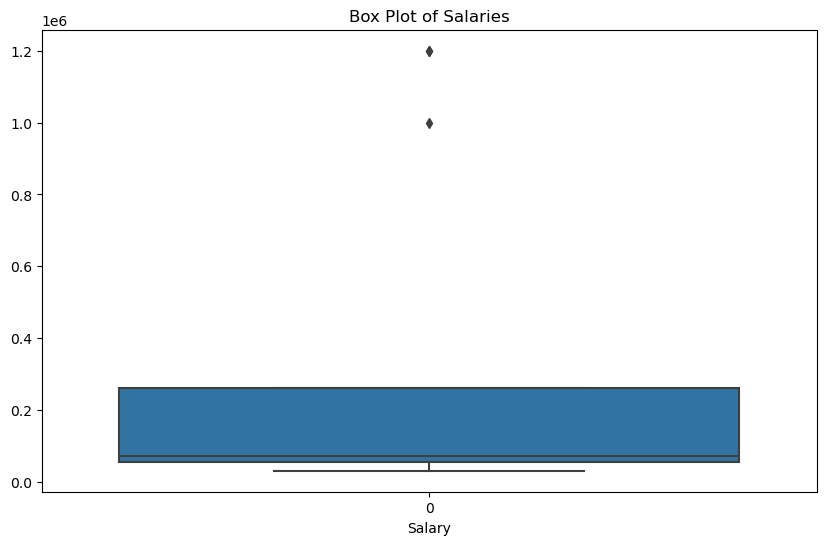

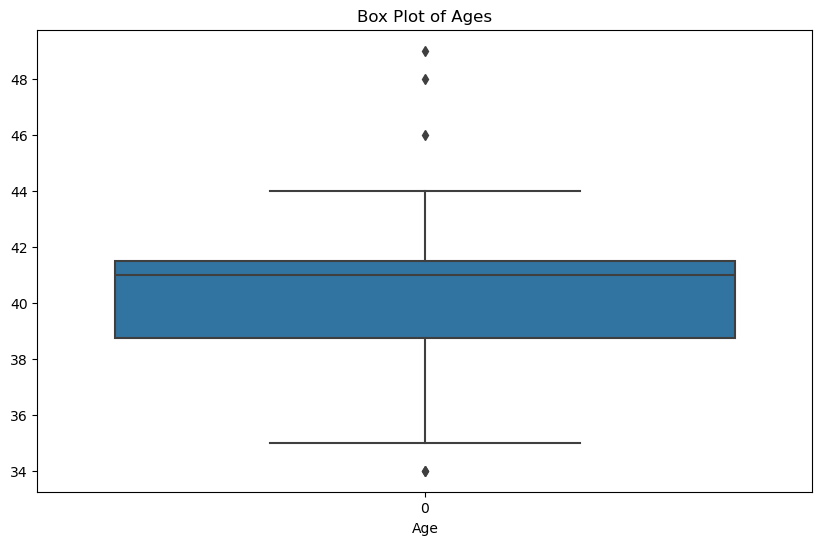

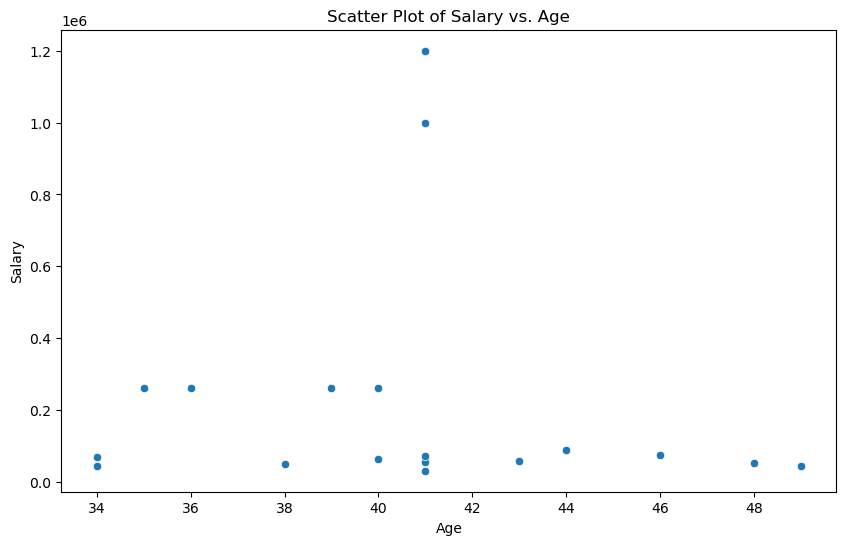

In [17]:
# 1. Box Plot of Salaries
plt.figure(figsize=(10, 6))
sns.boxplot(df['Salary'])
plt.title('Box Plot of Salaries')
plt.xlabel('Salary')
plt.show()

# 2. Box Plot of Ages
plt.figure(figsize=(10, 6))
sns.boxplot(df['Age'].dropna())
plt.title('Box Plot of Ages')
plt.xlabel('Age')
plt.show()

# 3. Scatter Plot of Salary vs. Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title('Scatter Plot of Salary vs. Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


### Insights from Outliers

**1. Box Plot of Salaries:**
   - **Insight**: The box plot reveals several outliers in the Salary column. Extreme values such as $1,200,000.00 and $1,000,000.00 are significantly higher than the rest of the dataset.

**2. Box Plot of Ages:**
   - **Insight**: The box plot of ages shows fewer outliers compared to the salary data. Most ages are concentrated within a reasonable range. However, a few points lie outside the typical range, indicating employees who might be unusually young or old for the typical working age range.

**3. Scatter Plot of Salary vs. Age:**
   - **Insight**: The scatter plot highlights the relationship between age and salary. It shows that the highest salaries are associated with various ages, suggesting that age is not a strong predictor of salary in this dataset. The outliers identified in the salary box plot are also evident here, standing out from the main cluster of data points.

### Detailed Analysis

#### High Salary Outliers:
   - **Employees**: Lily Evans, Oliver Queen, Barry Allen.
   - **Salaries**: $1,200,000.00 each for Lily Evans and Oliver Queen, $1,000,000.00 for Barry Allen.
   - **Departments**: HR (Lily Evans), Engineering (Oliver Queen and Barry Allen).
   - **Insights**: These extremely high salaries are significantly higher than the average and median salaries in the dataset. These outliers may represent top executives, highly specialized roles, or data entry errors.

#### Negative Salary Outlier:
   - **Employee**: Victor Stone.
   - **Salary**: -$45,000.00.
   - **Department**: Marketing.
   - **Insights**: This negative salary value is likely a data entry error, as it is not reasonable for an employee to have a negative salary.

#### Missing Date_of_Birth:
   - **Employees**: Jane Smith, Barry Allen, Hal Jordan.
   - **Insights**: Missing dates of birth can lead to incomplete age calculations and potentially affect analysis that relies on age data.

#### Missing Salary:
   - **Employees**: Sarah Davis, Diana Prince, Hal Jordan, Roy Harper.
   - **Insights**: Missing salary values could affect the analysis of salary distribution and departmental salary averages.

#### General Trends:
   - **Salary Distribution**: The dataset shows a wide range of salaries with significant outliers on both the high and low ends. The majority of salaries fall within a more typical range.
   - **Age Distribution**: Most employees fall within a reasonable working age range, with some outliers. This indicates that while the majority of the workforce is of typical working age, there are some exceptions.

### Actions for Data Cleaning:
   - **Address Negative Salaries**: Verify and correct the negative salary value for Victor Stone.
   - **Investigate High Salaries**: Verify if the high salaries for Lily Evans, Oliver Queen, and Barry Allen are accurate or if they are data entry errors.
   - **Handle Missing Values**: Impute or handle missing values for Date_of_Birth and Salary to ensure complete and accurate analysis.
   - **Outlier Treatment**: Consider capping or transforming extreme salary outliers to reduce their impact on the overall analysis.

These insights can guide further cleaning and processing steps to ensure a more accurate and reliable dataset for analysis.


In [18]:
# Identify and cap outliers using the IQR method
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR # -255312.5
upper_bound = Q3 + 1.5 * IQR # 570187.5

df['Salary'] = np.where(df['Salary'] < lower_bound, lower_bound, df['Salary'])
df['Salary'] = np.where(df['Salary'] > upper_bound, upper_bound, df['Salary'])

# Normalizing department names
df['Department'] = df['Department'].replace('not_specified', np.nan)
df['Department'] = df['Department'].fillna('Unknown')

# Final clean DataFrame
print(df)

    ID           Name Date_of_Birth    Salary   Department  Age
0    1       John Doe    1985-10-12   50000.0      Finance   38
1    2     Jane Smith    1983-06-20   62000.0    Marketing   41
2    3    Emily Jones    1990-04-15   70000.0  Engineering   34
3    4  Michael Brown    1975-02-20   45000.0           HR   49
4    5    Sarah Davis    1988-08-25  260625.0        Sales   35
5    6      Peter Pan    1983-07-21   55000.0      Finance   41
6    7     Lily Evans    1983-06-20  570187.5           HR   41
7    8     Tom Riddle    1982-11-30   31000.0    Marketing   41
8    9    Bruce Wayne    1978-03-10   75000.0      Finance   46
9   10     Clark Kent    1979-12-01   90000.0  Engineering   44
10  11   Diana Prince    1984-05-19  260625.0        Sales   40
11  12    Barry Allen    1983-06-20  570187.5  Engineering   41
12  13   Arthur Curry    1983-10-10   65000.0    Marketing   40
13  14     Hal Jordan    1983-06-20   72000.0           HR   41
14  15   Victor Stone    1989-11-15   45

# Data Analysis and Aggregation

In [19]:
# Calculate the average salary per department
average_salary_per_dept = df.groupby('Department')['Salary'].mean()
print("Average Salary per Department:")
print(average_salary_per_dept)

# Find the top 3 highest-paid employees
top_3_employees = df.nlargest(3, 'Salary')
print("\nTop 3 Highest Paid Employees:")
print(top_3_employees[['Name', 'Salary']])

# Determine the number of employees in each department
employee_count_per_dept = df['Department'].value_counts()
print("\nNumber of Employees per Department:")
print(employee_count_per_dept)

Average Salary per Department:
Department
Engineering    325093.750
Finance         59500.000
HR             184796.875
Marketing       92725.000
Sales          260625.000
Name: Salary, dtype: float64

Top 3 Highest Paid Employees:
            Name    Salary
6     Lily Evans  570187.5
11   Barry Allen  570187.5
18  Oliver Queen  570187.5

Number of Employees per Department:
Department
Marketing      5
Finance        4
Engineering    4
HR             4
Sales          3
Name: count, dtype: int64
